# Comprehensive Assessment : Deep Learning - Predicting Diabetes

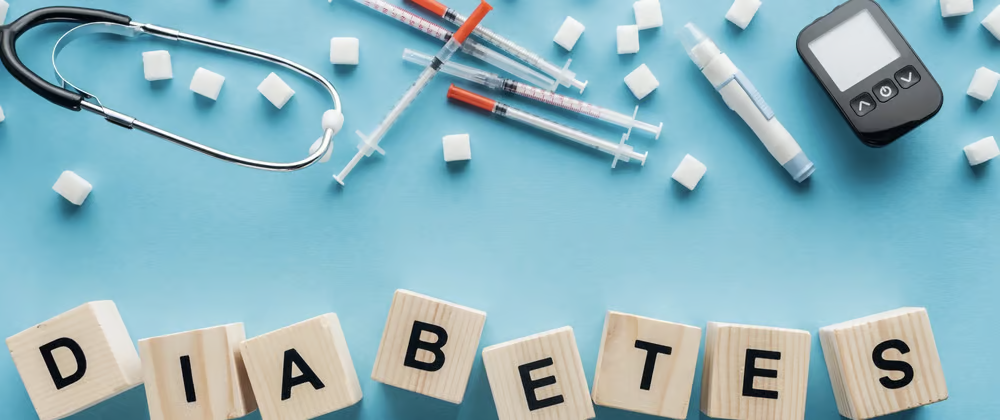

## Objective:
The objective is to create a model that predicts how diabetes progresses using the given independent variables. This model will help healthcare professionals see how different factors affect diabetes progression, which can help them create better treatment plans and preventive strategies. The goal is to provide clear insights into how diabetes develops in patients over time.

In [30]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1.Loading and Preprocessing 

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = datasets.load_diabetes()
X, y = df.data, df.target
df = pd.DataFrame(data=X, columns=df.feature_names)
df['target'] = y

In [32]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [33]:
# Display last 5 rows
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [34]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Discription
This dataset is part of a diabetes study, containing 442 samples with 10 normalized features and a target variable. The features include patient metrics like age, sex, Body Mass Index (BMI), blood pressure, and six blood serum measurements (s1-s6). The target variable represents a quantitative measure of diabetes progression one year after baseline. This data is typically used to model and predict how different factors influence the progression of diabetes, aiding in the understanding and management of the disease.

## EDA (Exploratory Data Analysis)

In [35]:
#shape
df.shape

(442, 11)

In [36]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [37]:
# Column
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [38]:
# Summary 
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [39]:
#null values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [40]:
# Check for duplicate 
df.duplicated().sum()

0

In [41]:
# Data Types
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [42]:
df.size

4862

In [43]:
df.iloc[:,0:8]

,age,sex,bmi,bp,s1,s2,s3,s4
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560


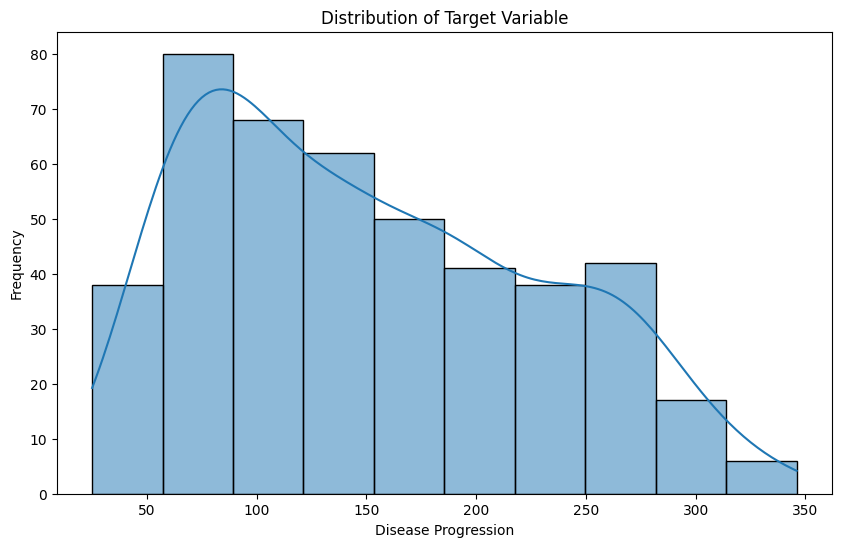

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()


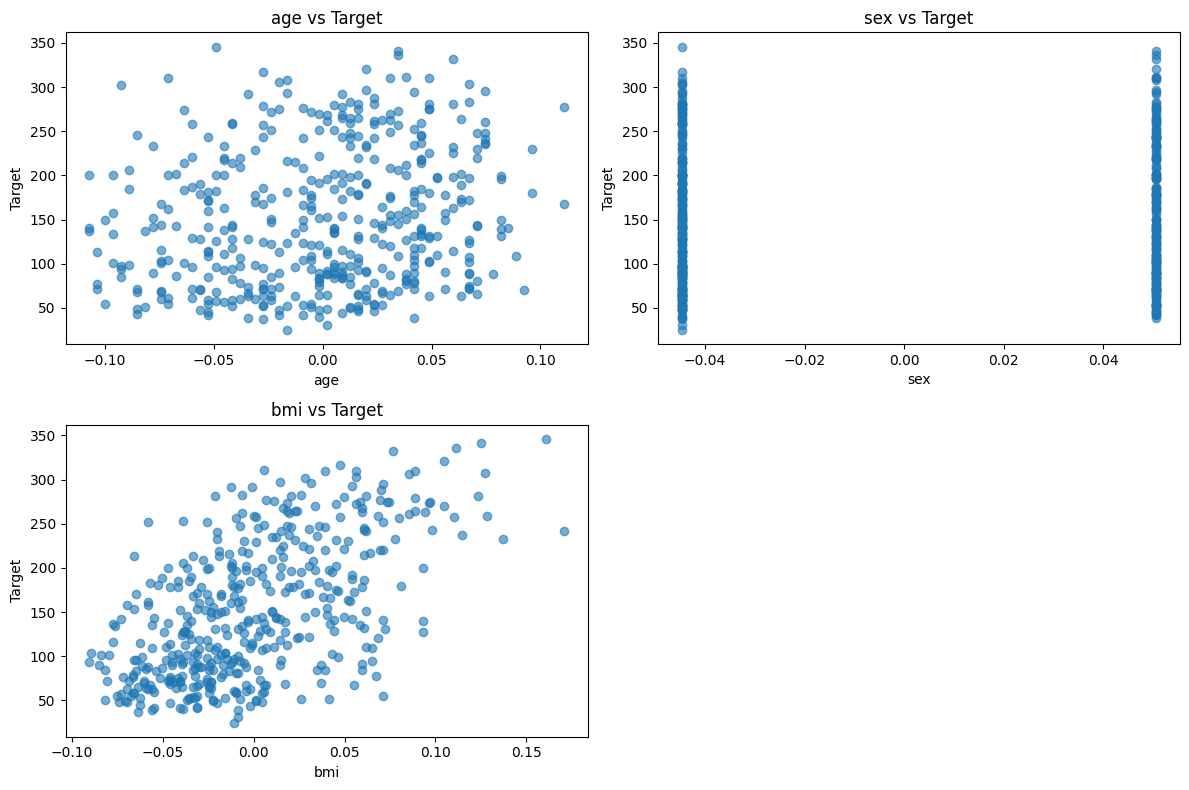

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, feat in enumerate(df.columns[:3]): 
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feat], df['target'], alpha=0.6)
    plt.title(f'{feat} vs Target')
    plt.xlabel(feat)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

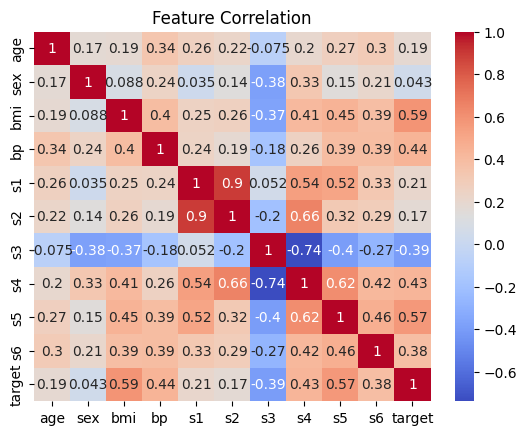

In [46]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## 3. Building the ANN Model 

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

## 4. Training the ANN Model

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

## 5.Evaluating the Model

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² Score: {r2}')


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002D0451CD3A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MSE: 3023.7981701398894
R² Score: 0.4292730156348381


## 6. Improving the Model

In [50]:
# Experiment with a different architecture
model_exp = Sequential()
model_exp.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_exp.add(Dense(64, activation='relu'))
model_exp.add(Dense(32, activation='relu'))
model_exp.add(Dense(1, activation='linear'))

# Compile and train the improved model
model_exp.compile(optimizer='adam', loss='mse')
history_exp = model_exp.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the improved model
y_pred_exp = model_exp.predict(X_test)
mse_exp = mean_squared_error(y_test, y_pred_exp)
r2_exp = r2_score(y_test, y_pred_exp)

print(f'Improved MSE: {mse_exp}')
print(f'Improved R² Score: {r2_exp}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Improved MSE: 2759.9555912408473
Improved R² Score: 0.47907200053045074


### Conclusion:
The initial model had an MSE of 3023.80 and an R² of 0.4293, showing moderate performance. After making some adjustments to the model, the MSE improved to 2759.96, and the R² increased to 0.4791. This means the updated model does a better job of predicting diabetes progression and understanding the factors involved.